In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project16/taxi_trip_pricing.csv')

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [4]:
df.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [5]:
df['Trip_Price'].fillna(df['Trip_Price'].mode()[0], inplace=True)


<ipython-input-5-e1f9f395c3ec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Trip_Price'].fillna(df['Trip_Price'].mode()[0], inplace=True)


In [6]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns


# **Random Forest**

In [7]:
df_rf = df.copy()


In [8]:
missing_cols = df_rf.columns[df.isnull().sum()>0]

for column in missing_cols:
  if df_rf[column].dtype=='object':
    df_rf[column].fillna(df_rf[column].mode()[0], inplace=True)
  else:
    df_rf[column].fillna(df_rf[column].mean(), inplace=True)


<ipython-input-8-70c71963e637>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_rf[column].fillna(df_rf[column].mean(), inplace=True)
<ipython-input-8-70c71963e637>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [9]:
categorical_cols


Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object')

In [10]:

for col in categorical_cols:
    le = LabelEncoder()
    df_rf[col] = le.fit_transform(df_rf[col])

In [11]:
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   int64  
 2   Day_of_Week            1000 non-null   int64  
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   int64  
 5   Weather                1000 non-null   int64  
 6   Base_Fare              1000 non-null   float64
 7   Per_Km_Rate            1000 non-null   float64
 8   Per_Minute_Rate        1000 non-null   float64
 9   Trip_Duration_Minutes  1000 non-null   float64
 10  Trip_Price             1000 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 86.1 KB


In [12]:
X = df_rf.drop('Trip_Price', axis=1)
y = df_rf['Trip_Price']

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=42)


In [14]:
scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [15]:
rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)



RandomForestRegressor(random_state=42)

In [16]:

y_pred=rf_model.predict(X_test)


In [17]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse}")
print(f"Random Forest MAE: {mae}")
print(f"Random Forest R2 Score: {r2}")


Random Forest MSE: 166.7276201154721
Random Forest MAE: 7.877177946052115
Random Forest R2 Score: 0.8799224976258085


# **XGBOOST**

In [18]:
df_xgb = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_xgb[col] = le.fit_transform(df_xgb[col])




In [19]:
X = df_xgb.drop(columns=['Trip_Price'])
y = df_xgb['Trip_Price']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression objective
    'max_depth': 6,                  # Maximum depth of trees
    'eta': 0.1,                      # Learning rate
    'subsample': 0.8,                # Subsample ratio of training instances
    'colsample_bytree': 0.8,         # Subsample ratio of columns
    'eval_metric': 'rmse'            # Evaluation metric
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')], early_stopping_rounds=10)


[0]	test-rmse:29.43659
[1]	test-rmse:27.31285
[2]	test-rmse:25.59157
[3]	test-rmse:23.99135
[4]	test-rmse:22.51193
[5]	test-rmse:21.04163
[6]	test-rmse:20.13750
[7]	test-rmse:19.07084
[8]	test-rmse:18.15873
[9]	test-rmse:17.29237
[10]	test-rmse:17.17760
[11]	test-rmse:16.34672
[12]	test-rmse:15.77386
[13]	test-rmse:15.22737
[14]	test-rmse:14.74216
[15]	test-rmse:14.36837
[16]	test-rmse:14.05958
[17]	test-rmse:13.88914
[18]	test-rmse:13.58482
[19]	test-rmse:13.42562
[20]	test-rmse:13.16464
[21]	test-rmse:13.08444
[22]	test-rmse:12.77947
[23]	test-rmse:12.58990
[24]	test-rmse:12.52487
[25]	test-rmse:12.42625
[26]	test-rmse:12.28833
[27]	test-rmse:12.15346
[28]	test-rmse:12.04232
[29]	test-rmse:11.99929
[30]	test-rmse:11.96821
[31]	test-rmse:11.84865
[32]	test-rmse:11.80702
[33]	test-rmse:11.69171
[34]	test-rmse:11.61794
[35]	test-rmse:11.59268
[36]	test-rmse:11.56274
[37]	test-rmse:11.48402
[38]	test-rmse:11.46518
[39]	test-rmse:11.40802
[40]	test-rmse:11.38419
[41]	test-rmse:11.36523
[4

In [22]:
#  predictions on the test set
y_pred = model.predict(dtest)


In [23]:
y[0]

36.2624

In [24]:
y_pred[0]

86.864845

In [25]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MSE: {mse}")
print(f"XGBoost MAE: {mae}")
print(f"XGBoost R2 Score: {r2}")


XGBoost MSE: 126.22968161023731
XGBoost MAE: 6.839829407938998
XGBoost R2 Score: 0.8610323552510666


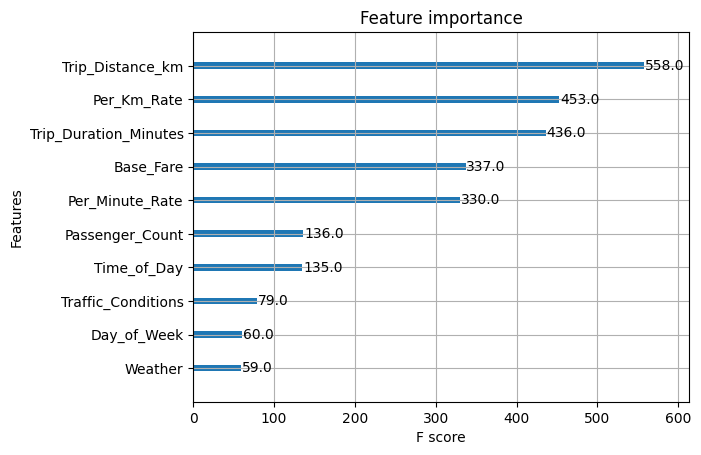

In [26]:
# Plot feature importance
xgb.plot_importance(model)
plt.show()


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             1000 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [28]:
# Save the model
# model.save_model('xgboost_discount_model.json')

# Load the model
# loaded_model = xgb.Booster()
# loaded_model.load_model('xgboost_discount_model.json')


# **LightGBM**

In [29]:
df_LGBM = df.copy()

for col in categorical_cols:
    df_LGBM[col] = df_LGBM[col].astype('category')

In [30]:
type(categorical_cols)

pandas.core.indexes.base.Index

In [31]:
categorical_cols

Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object')

In [32]:
# Define the data and the labels
X = df_LGBM.drop('Trip_Price', axis=1)
y = df_LGBM['Trip_Price']



In [33]:
X.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Trip_Distance_km       950 non-null    float64 
 1   Time_of_Day            950 non-null    category
 2   Day_of_Week            950 non-null    category
 3   Passenger_Count        950 non-null    float64 
 4   Traffic_Conditions     950 non-null    category
 5   Weather                950 non-null    category
 6   Base_Fare              950 non-null    float64 
 7   Per_Km_Rate            950 non-null    float64 
 8   Per_Minute_Rate        950 non-null    float64 
 9   Trip_Duration_Minutes  950 non-null    float64 
dtypes: category(4), float64(6)
memory usage: 51.5 KB


In [35]:

# Create the dataset for LightGBM
train_data = lgb.Dataset(X, label=y, categorical_feature=list(categorical_cols))

In [36]:
train_data

In [37]:
# Train the model with appropriate parameters
params = {
    'objective': 'regression',  # Using regression because the target 'Discount on Fees' is continuous
    'metric': 'rmse'  # RMSE for regression
}



In [38]:
model = lgb.train(params, train_data)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 10
[LightGBM] [Info] Start training from score 54.388127


In [39]:
y_pred = model.predict(X)



In [40]:
# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"LGBoost MSE: {mse}")
print(f"LGBoost MAE: {mae}")
print(f"LGBoost R2 Score: {r2}")

LGBoost MSE: 65.53834232959585
LGBoost MAE: 3.3921296085141055
LGBoost R2 Score: 0.9608941648274617


# **Comparing**

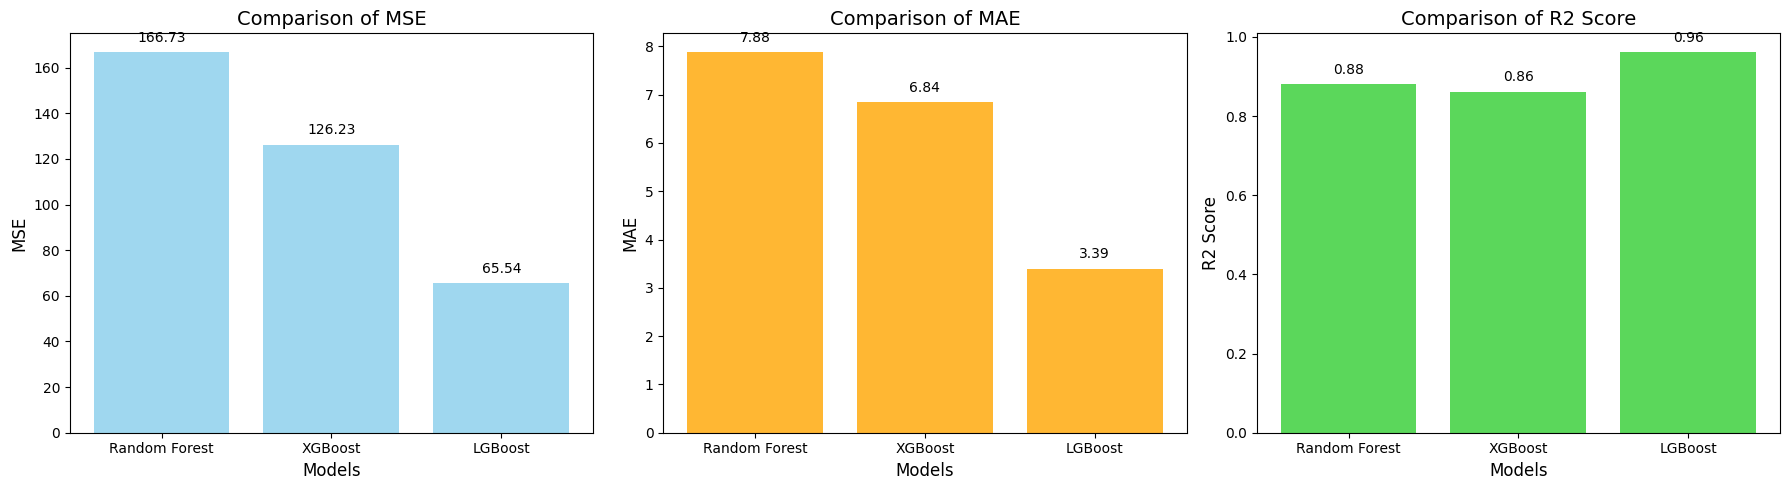

In [41]:
# Data for the models
models = ['Random Forest', 'XGBoost', 'LGBoost']
metrics = ['MSE', 'MAE', 'R2 Score']
mse = [166.7276201154721, 126.22968161023731, 65.53834232959585]
mae = [7.877177946052115, 6.839829407938998, 3.3921296085141055]
r2 = [0.8799224976258085, 0.8610323552510666, 0.9608941648274617]

# Combine data for grouping
data = [mse, mae, r2]

# Colors for the bars
colors = ['skyblue', 'orange', 'limegreen']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

for i, (metric, values) in enumerate(zip(metrics, data)):
    ax = axes[i]
    ax.bar(models, values, color=colors[i], alpha=0.8)
    ax.set_title(f'Comparison of {metric}', fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('Models', fontsize=12)

    # Add value labels to each bar
    for j, value in enumerate(values):
        ax.text(j, value + 0.02 * max(values), f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
